In [1]:
!pip install scikit-learn==1.2.2

In [2]:
import os
import zipfile
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import shutil

In [3]:
# Load the genre_synonym.csv file
df = pd.read_csv('/kaggle/input/d/a2162014/genre-synonyms/genre_synonyms(final).csv')

# Prepare the dataset: Split the DataFrame into texts (features) and labels
texts = df['features'].values
labels = df['labels'].values

# Vectorize features using TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)

# Encode labels into numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

In [4]:
# Define models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
}

# Create a directory to save the models
if not os.path.exists("saved_models"):
    os.makedirs("saved_models")

# Initialize lists to store the metrics
model_metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

# Train and evaluate each model once, then store results and save models
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X, y)
    y_pred = model.predict(X)

    # Compute metrics
    accuracy = accuracy_score(y, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y, y_pred, average='weighted')

    # Append metrics to the list
    model_metrics["Model"].append(model_name)
    model_metrics["Accuracy"].append(accuracy)
    model_metrics["Precision"].append(precision)
    model_metrics["Recall"].append(recall)
    model_metrics["F1 Score"].append(f1)

    # Print the classification report
    print(f"{model_name} Performance:")
    print(classification_report(y, y_pred))
    print(f"Accuracy: {accuracy}")
    print("-" * 50)

    # Save the trained model using joblib
    joblib.dump(model, f"saved_models/{model_name}_model.pkl")
    print(f"{model_name} model saved as {model_name}_model.pkl")

    # Display Confusion Matrix and save as image
    cm = confusion_matrix(y, y_pred)
    cm_display = pd.DataFrame(cm, index=label_encoder.classes_, columns=label_encoder.classes_)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_display, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 12})
    plt.title(f"Confusion Matrix for {model_name}")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig(f"saved_models/{model_name}_confusion_matrix.png")
    plt.close()

# Save the vectorizer and label encoder
joblib.dump(vectorizer, 'saved_models/vectorizer.pkl')
joblib.dump(label_encoder, 'saved_models/label_encoder.pkl')
print("Vectorizer and LabelEncoder saved.")

# Compress the saved models and encoders into a single zip file
shutil.make_archive('saved_models', 'zip', 'saved_models')
print("All models, vectorizer, and encoder saved into 'saved_models.zip'")

Training Naive Bayes...
Naive Bayes Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         4
          16       1.00      1.0

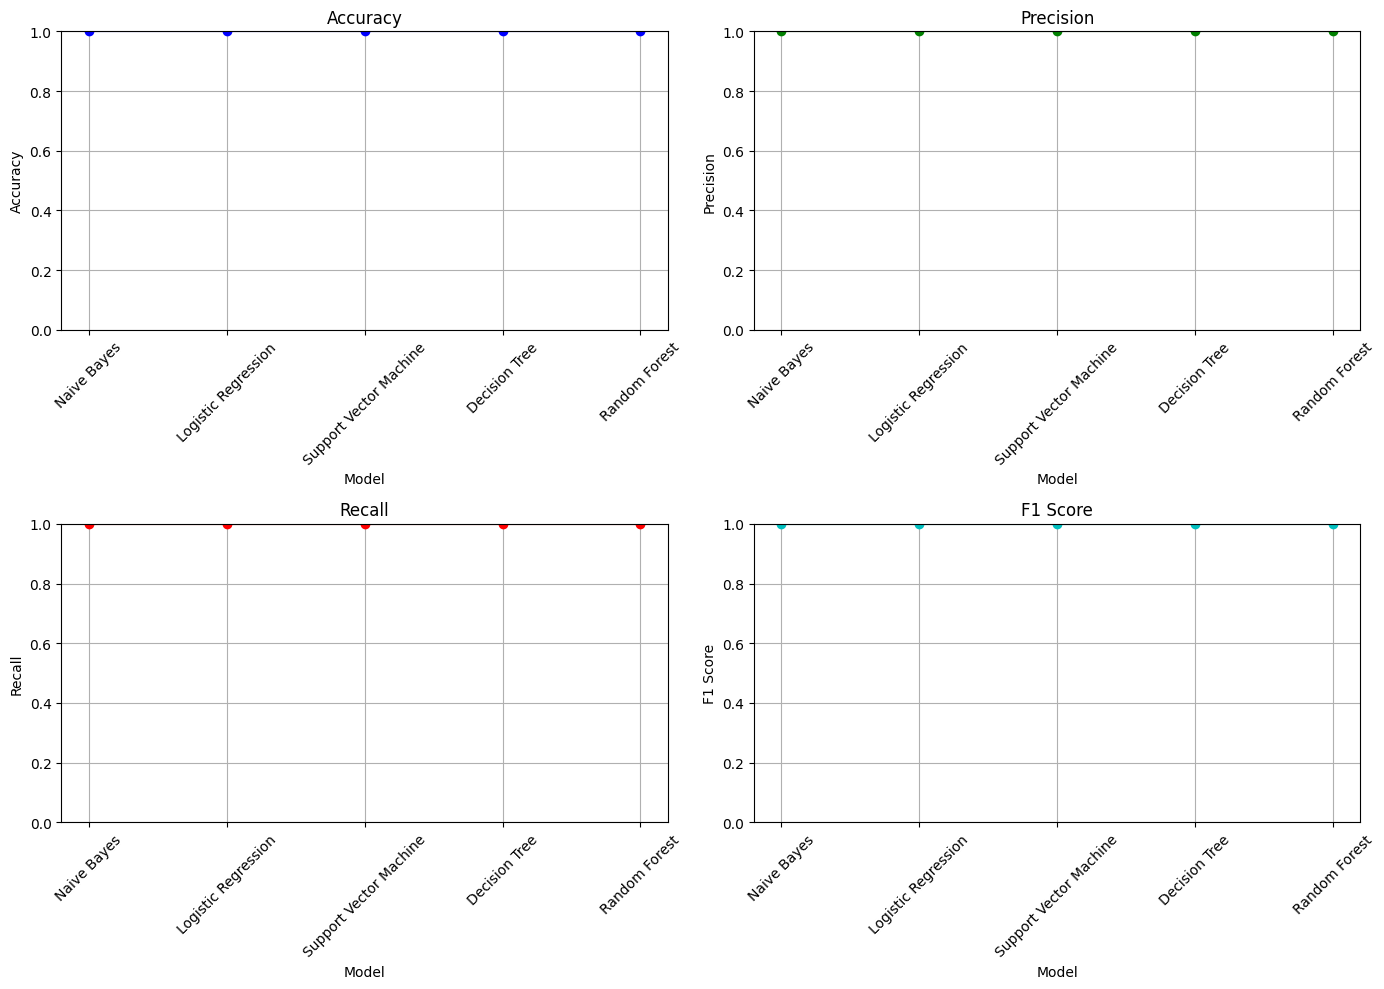

In [5]:
# Plot the metrics for each model in line graph format
metrics_df = pd.DataFrame(model_metrics)
metrics_df.set_index("Model", inplace=True)

# Set up subplots for each metric
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot accuracy
axes[0, 0].plot(metrics_df.index, metrics_df['Accuracy'], marker='o', color='b', label='Accuracy')
axes[0, 0].set_title("Accuracy")
axes[0, 0].set_ylabel("Accuracy")
axes[0, 0].set_xlabel("Model")
axes[0, 0].set_ylim([0, 1])
axes[0, 0].grid(True)
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot precision
axes[0, 1].plot(metrics_df.index, metrics_df['Precision'], marker='o', color='g', label='Precision')
axes[0, 1].set_title("Precision")
axes[0, 1].set_ylabel("Precision")
axes[0, 1].set_xlabel("Model")
axes[0, 1].set_ylim([0, 1])
axes[0, 1].grid(True)
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot recall
axes[1, 0].plot(metrics_df.index, metrics_df['Recall'], marker='o', color='r', label='Recall')
axes[1, 0].set_title("Recall")
axes[1, 0].set_ylabel("Recall")
axes[1, 0].set_xlabel("Model")
axes[1, 0].set_ylim([0, 1])
axes[1, 0].grid(True)
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot F1 Score
axes[1, 1].plot(metrics_df.index, metrics_df['F1 Score'], marker='o', color='c', label='F1 Score')
axes[1, 1].set_title("F1 Score")
axes[1, 1].set_ylabel("F1 Score")
axes[1, 1].set_xlabel("Model")
axes[1, 1].set_ylim([0, 1])
axes[1, 1].grid(True)
axes[1, 1].tick_params(axis='x', rotation=45)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [6]:
# Test the models with a few test inputs
test_inputs = [
    "action movie",
    "funny comedy",
    "battle adventure",
    "scary",
    "fantasy"
]

# Load the vectorizer and label encoder
vectorizer = joblib.load('saved_models/vectorizer.pkl')
label_encoder = joblib.load('saved_models/label_encoder.pkl')

# Vectorize the test inputs
X_test_input = vectorizer.transform(test_inputs)

# Load and test the saved models with the test inputs
for model_name in models.keys():
    print(f"\nLoading {model_name} model and testing with sample inputs:")
    loaded_model = joblib.load(f"saved_models/{model_name}_model.pkl")
    predictions = loaded_model.predict(X_test_input)
    # Decode the predictions back to genre labels
    decoded_predictions = label_encoder.inverse_transform(predictions)
    print(f"Predictions: {decoded_predictions}")


Loading Naive Bayes model and testing with sample inputs:
Predictions: ['action' 'comedy' 'war' 'horror' 'fantasy']

Loading Logistic Regression model and testing with sample inputs:
Predictions: ['action' 'comedy' 'war' 'horror' 'fantasy']

Loading Support Vector Machine model and testing with sample inputs:
Predictions: ['movie' 'comedy' 'war' 'horror' 'fantasy']

Loading Decision Tree model and testing with sample inputs:
Predictions: ['action' 'comedy' 'adventure' 'horror' 'fantasy']

Loading Random Forest model and testing with sample inputs:
Predictions: ['movie' 'comedy' 'adventure' 'horror' 'fantasy']
